<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 22 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Timestamp                                                                                      102 non-null    object
 1   Email Address                                                                                  102 non-null    object
 2   Name                                                                                           98 non-null     object
 3   Age                                                                                            102 non-null    object
 4   Academic level                                                                                 102 non-null    object
 5   How many hours do you spend s

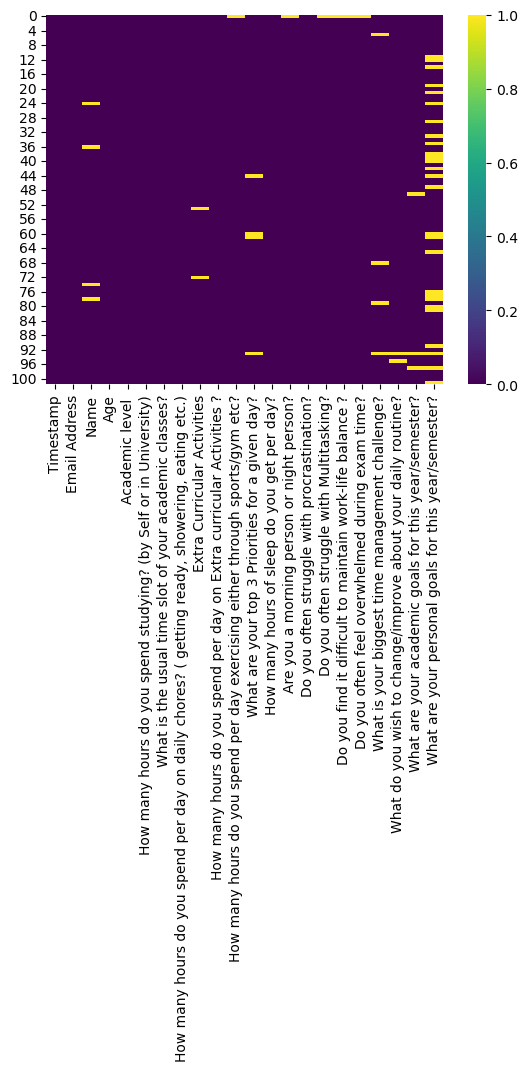


Number of Missing Values: Age                                                                                              0
Academic level                                                                                   0
How many hours do you spend studying? (by Self or in University)                                 0
What is the usual time slot of your academic classes?                                            0
How many hours do you spend per day on daily chores? ( getting ready, showering, eating etc.)    0
Extra Curricular Activities                                                                      2
How many hours do you spend per day on Extra curricular Activities ?                             0
How many hours do you spend per day exercising either through sports/gym etc?                    1
What are your top 3 Priorities for a given day?                                                  4
How many hours of sleep do you get per day?                                       

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the data
df = pd.read_csv(r"C:\Users\DELL\OneDrive - UPES\Desktop\Semester 3\Elements of AIML\Assignments\Assignment 3\Student Life Survey (Responses).csv")

# Get basic information
print(df.info())
print(df.describe())
print(df.head())
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Check for missing values
print("\nNumber of Missing Values:",df.isnull().sum().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

#Dropping irrelevant columns
df=df.drop(['Timestamp', 'Email Address','Name','What is your biggest time management challenge?','What do you wish to change/improve about your daily routine?','What are your academic goals for this year/semester?','What are your personal goals for this year/semester?'], axis=1)  # Drop multiple columns 

#Checking missing values after dropping columns
print("\nNumber of Missing Values:",df.isnull().sum())

#Finding mode for each column 
print(df.mode().iloc[0])

#Columns with multiple modes are stored as Series
modes=df['What is the usual time slot of your academic classes?'].mode()
modes2 =df['Extra Curricular Activities'].mode()
modes3=df['What are your top 3 Priorities for a given day?'].mode()
print(modes)
print(modes2)
print(modes3)

#Imputing missing values with their respective modes
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode = df[col].mode()[0]
    df.loc[:, col] = df[col].fillna(mode)  # Use .loc for in-place assignment
    
#Checking missing values after handling missing values
print("\nNumber of Missing Values:",df.isnull().sum())


cols = df.select_dtypes(include=['object']).columns

# Perform Chi-Square test for all pairs of categorical columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        if p < 0.05:
            print(f"There is a significant association between {col1} and {col2}")
        else:
            print(f"There is no significant association between {col1} and {col2}")